# Modelo KNN para o trabalho final

## Imports

In [560]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.utils import resample
import optuna

## Análise exploratória

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


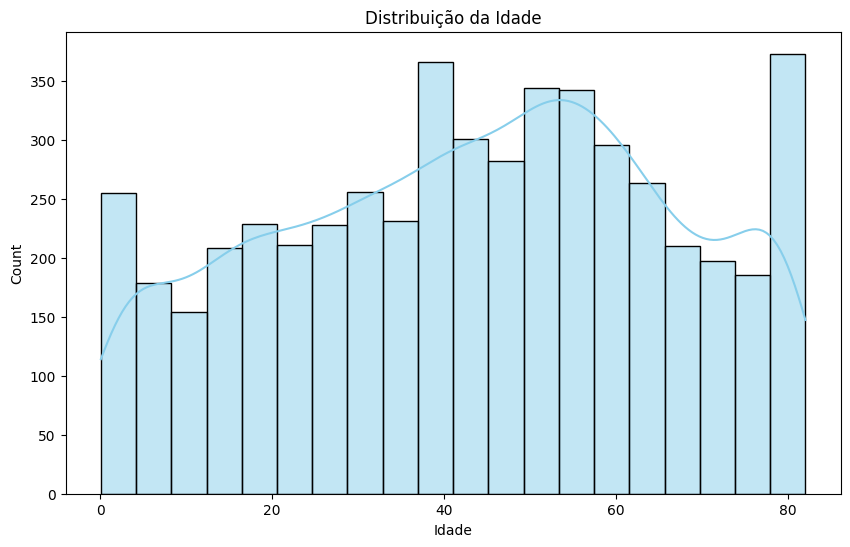

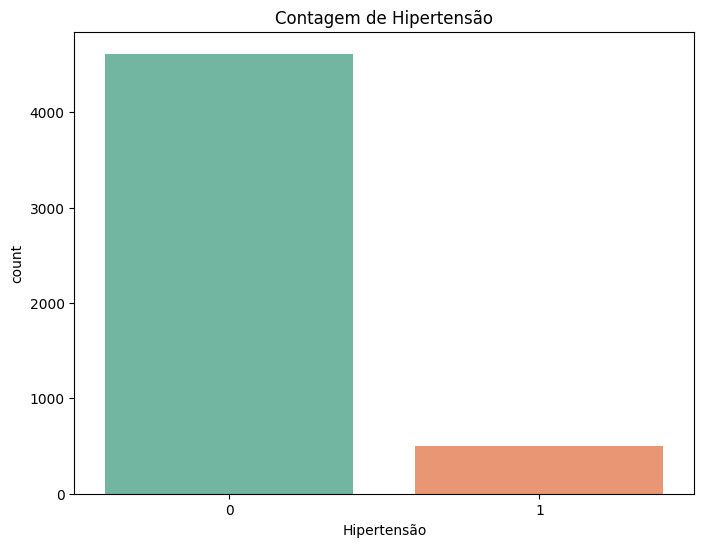

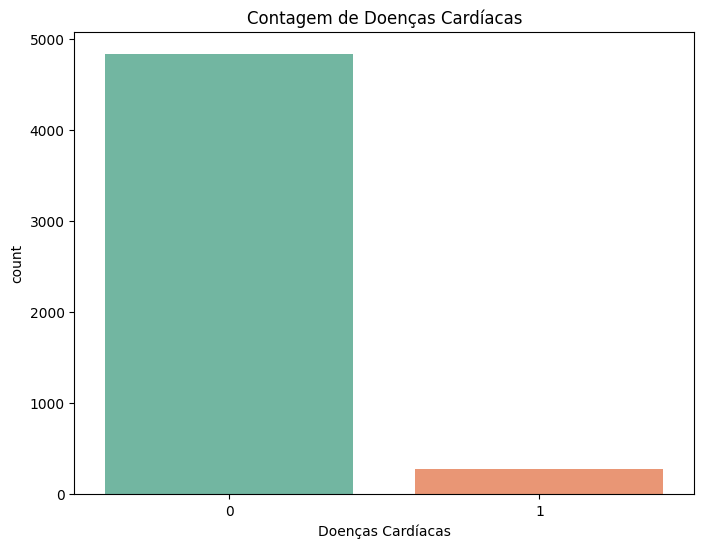

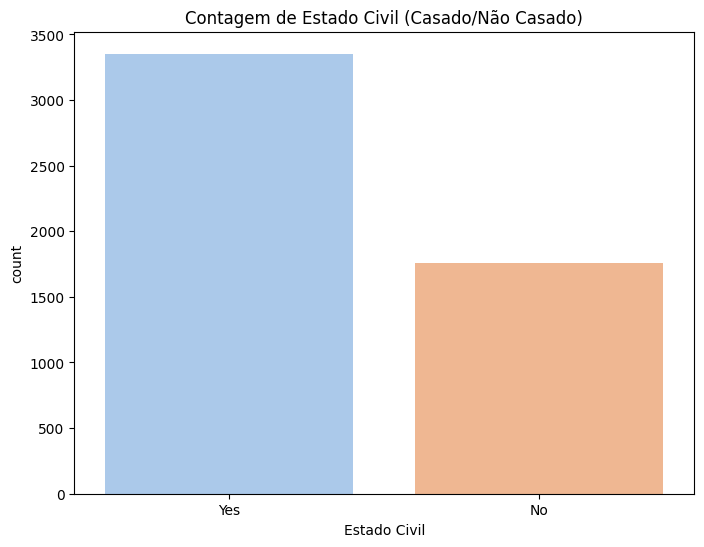

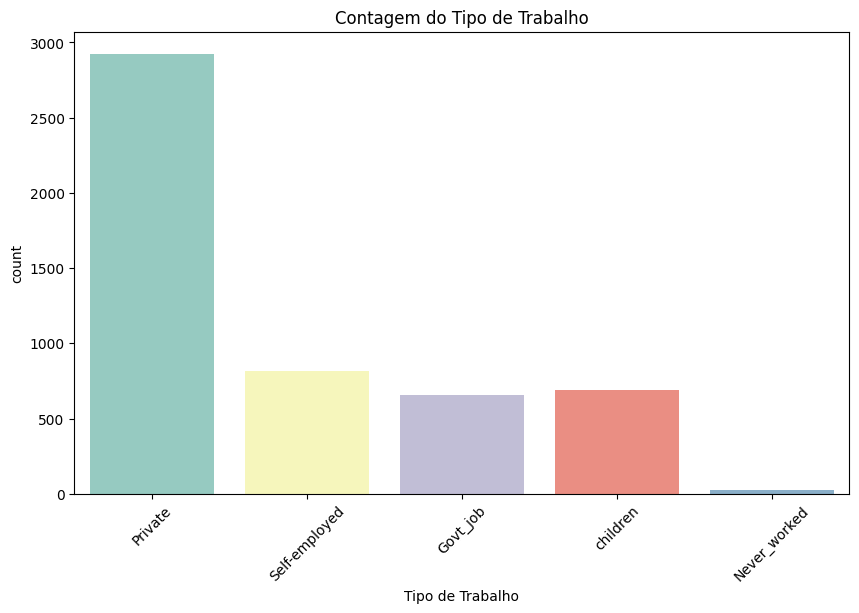

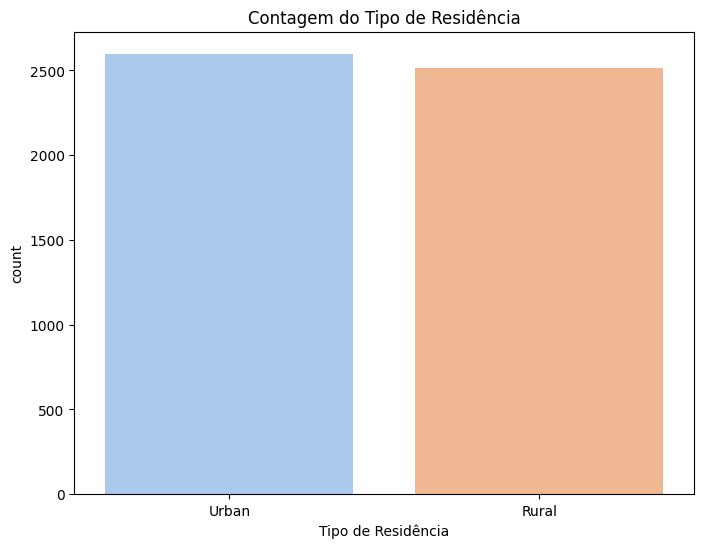

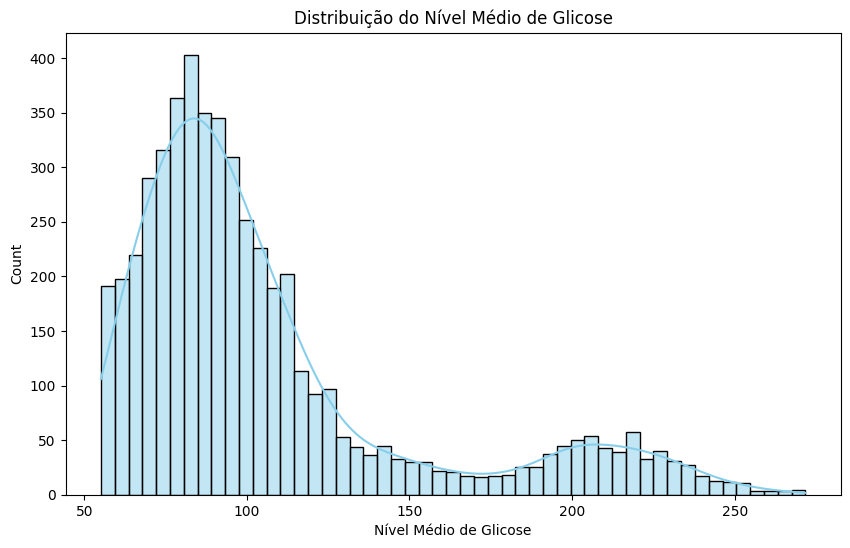

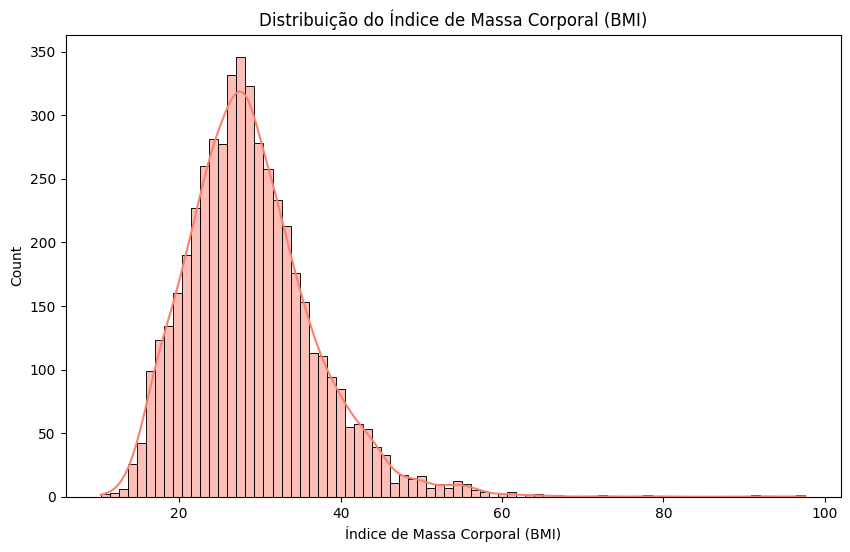

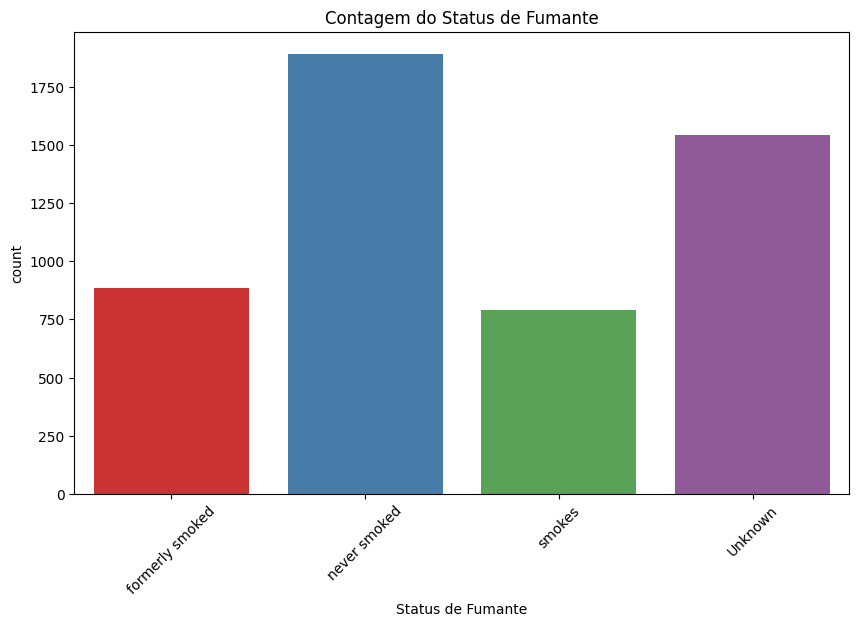

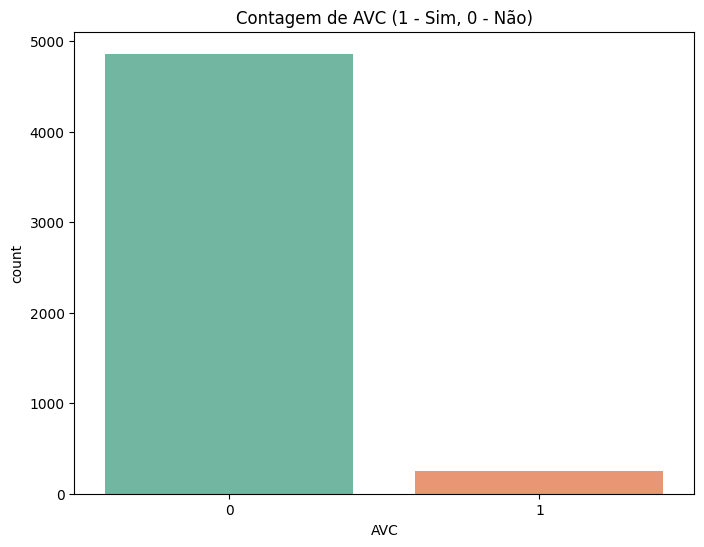

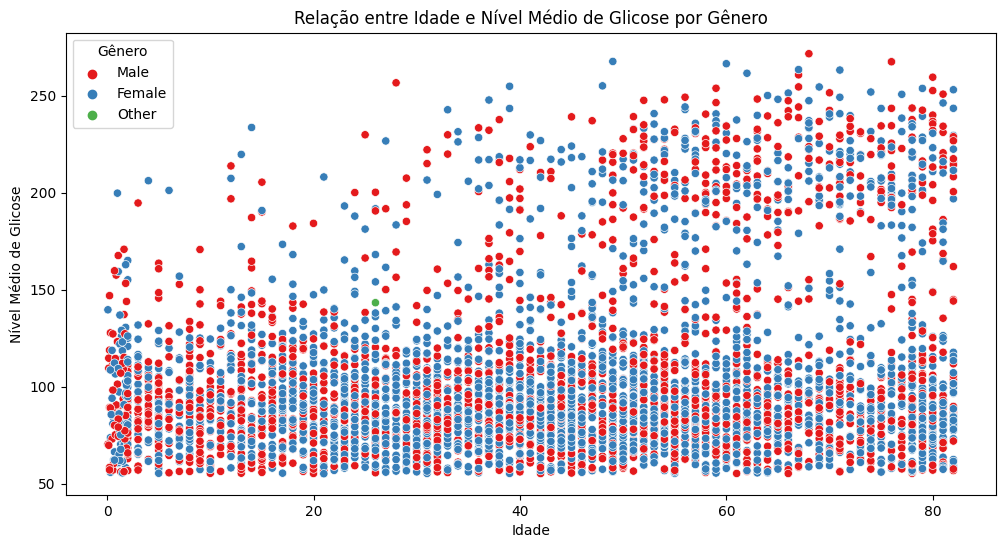

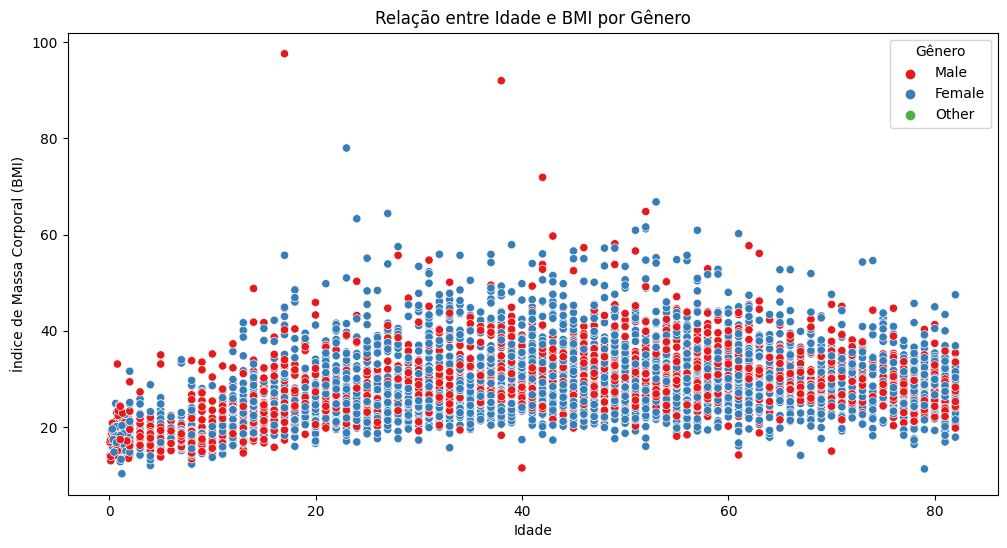

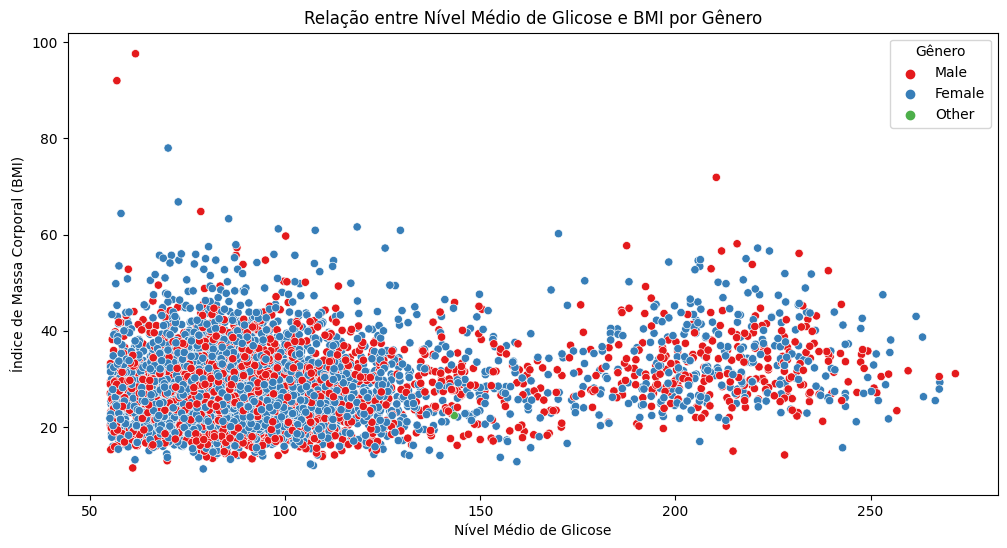

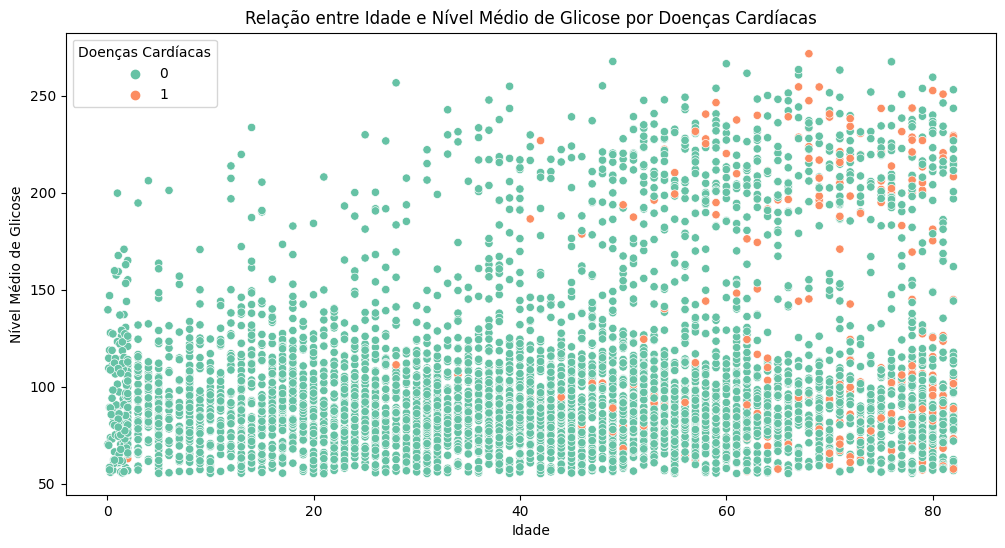

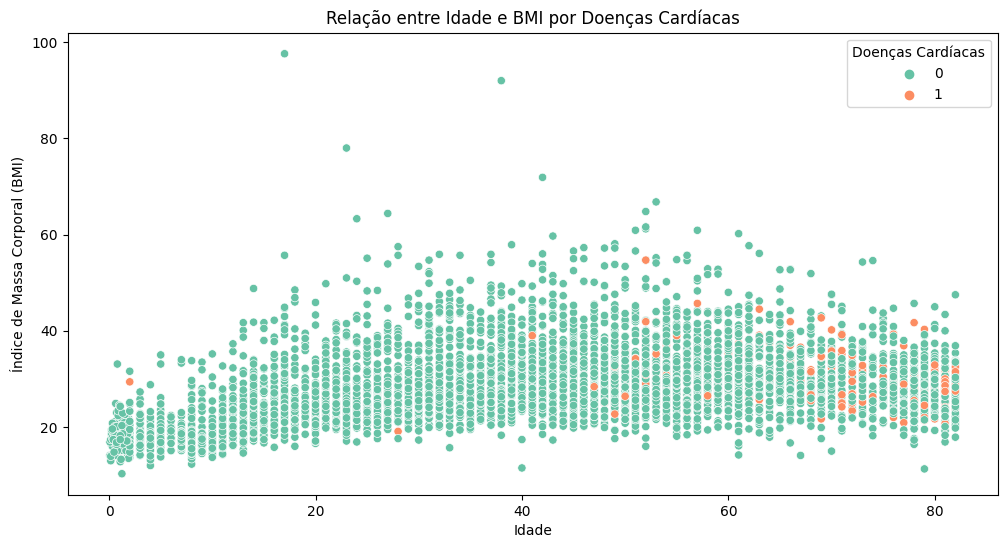

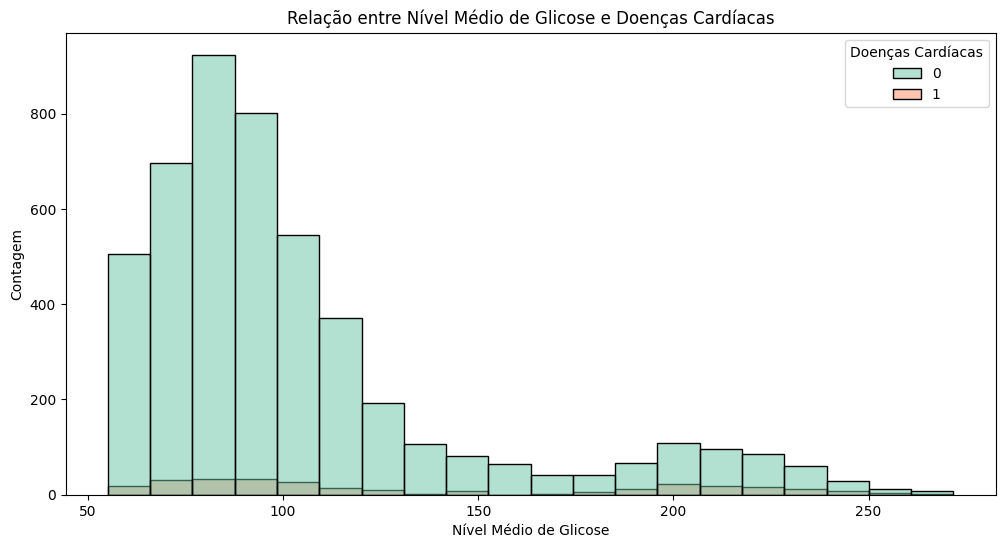

In [561]:
# Carregando os dados a partir do arquivo CSV

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

print(data['work_type'].unique())
 
# Tradução dos atributos

data = data.rename(columns={'gender': 'Gênero', 'age': 'Idade', 'hypertension': 'Hipertensão', 'heart_disease': 'Doenças Cardíacas',

                          'ever_married': 'Estado Civil', 'work_type': 'Tipo de Trabalho', 'Residence_type': 'Tipo de Residência',

                          'avg_glucose_level': 'Nível Médio de Glicose', 'bmi': 'Índice de Massa Corporal (BMI)', 'smoking_status': 'Status de Fumante',

                          'stroke': 'AVC'})
 
# Análise exploratória
 
# Gráfico de distribuição da Idade

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Idade', kde=True, color='skyblue')

plt.title('Distribuição da Idade')

plt.show()
 
# Gráfico de contagem de Hipertensão

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Hipertensão', palette='Set2')

plt.title('Contagem de Hipertensão')

plt.show()
 
# Gráfico de contagem de Doenças Cardíacas

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Doenças Cardíacas', palette='Set2')

plt.title('Contagem de Doenças Cardíacas')

plt.show()
 
# Gráfico de contagem de Estado Civil

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Estado Civil', palette='pastel')

plt.title('Contagem de Estado Civil (Casado/Não Casado)')

plt.show()
 
# Gráfico de contagem do Tipo de Trabalho

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='Tipo de Trabalho', palette='Set3')

plt.title('Contagem do Tipo de Trabalho')

plt.xticks(rotation=45)

plt.show()
 
# Gráfico de contagem do Tipo de Residência

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Tipo de Residência', palette='pastel')

plt.title('Contagem do Tipo de Residência')

plt.show()
 
# Gráfico de distribuição do Nível Médio de Glicose

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Nível Médio de Glicose', kde=True, color='skyblue')

plt.title('Distribuição do Nível Médio de Glicose')

plt.show()
 
# Gráfico de distribuição do Índice de Massa Corporal (BMI)

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Índice de Massa Corporal (BMI)', kde=True, color='salmon')

plt.title('Distribuição do Índice de Massa Corporal (BMI)')

plt.show()
 
# Gráfico de contagem do Status de Fumante

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='Status de Fumante', palette='Set1')

plt.title('Contagem do Status de Fumante')

plt.xticks(rotation=45)

plt.show()
 
# Gráfico de contagem de AVC

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='AVC', palette='Set2')

plt.title('Contagem de AVC (1 - Sim, 0 - Não)')

plt.show()
 
# Gráfico de relação entre Idade e Nível Médio de Glicose por Gênero

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Nível Médio de Glicose', hue='Gênero', palette='Set1')

plt.title('Relação entre Idade e Nível Médio de Glicose por Gênero')

plt.show()
 
# Gráfico de relação entre Idade e BMI por Gênero

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Índice de Massa Corporal (BMI)', hue='Gênero', palette='Set1')

plt.title('Relação entre Idade e BMI por Gênero')

plt.show()
 
# Gráfico de relação entre Nível Médio de Glicose e BMI por Gênero

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Nível Médio de Glicose', y='Índice de Massa Corporal (BMI)', hue='Gênero', palette='Set1')

plt.title('Relação entre Nível Médio de Glicose e BMI por Gênero')

plt.show()
 
# Gráfico de relação entre Idade e Nível Médio de Glicose por Doenças Cardíacas

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Nível Médio de Glicose', hue='Doenças Cardíacas', palette='Set2')

plt.title('Relação entre Idade e Nível Médio de Glicose por Doenças Cardíacas')

plt.show()
 
# Gráfico de relação entre Idade e BMI por Doenças Cardíacas

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Índice de Massa Corporal (BMI)', hue='Doenças Cardíacas', palette='Set2')

plt.title('Relação entre Idade e BMI por Doenças Cardíacas')

plt.show()
 
plt.figure(figsize=(12, 6))

sns.histplot(data=data, x='Nível Médio de Glicose', hue='Doenças Cardíacas', bins=20, palette='Set2', kde=False)

plt.title('Relação entre Nível Médio de Glicose e Doenças Cardíacas')

plt.xlabel('Nível Médio de Glicose')

plt.ylabel('Contagem')

plt.show()


## Resample

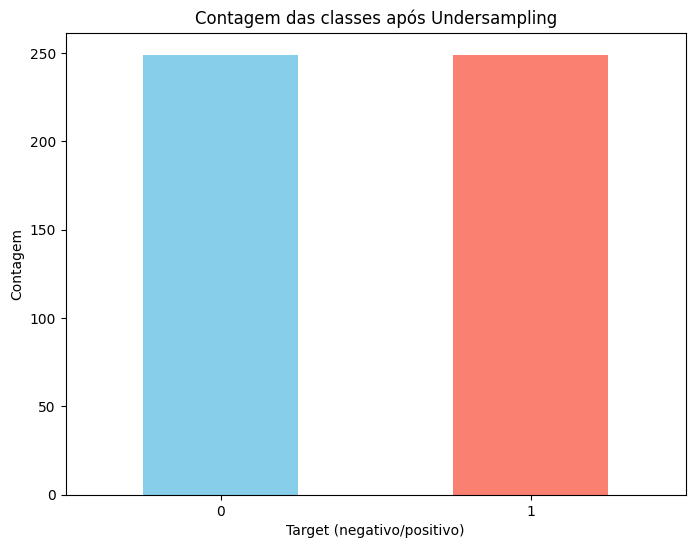

,id,Gênero,Idade,Hipertensão,Doenças Cardíacas,Estado Civil,Tipo de Trabalho,Tipo de Residência,Nível Médio de Glicose,Índice de Massa Corporal (BMI),Status de Fumante,AVC
2435,2244,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
3600,26076,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2900,31019,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
2353,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4060,68330,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [562]:
from sklearn.utils import resample
 
df_maioria = data[data.AVC == 0]
df_minoria = data[data.AVC == 1]
 
# Escolha o número de amostras que você deseja na classe majoritária

# Aqui, estou usando a metade do tamanho da classe minoritária

maioria_resampled = resample(df_maioria, replace=False, n_samples=len(df_minoria), random_state=42)
df_resampled = pd.concat([maioria_resampled, df_minoria])
 
# Crie um gráfico de barras para visualizar a contagem de 0s e 1s

plt.figure(figsize=(8, 6))

df_resampled['AVC'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Contagem das classes após Undersampling')

plt.xlabel('Target (negativo/positivo)')

plt.ylabel('Contagem')

plt.xticks(rotation=0)

plt.show()
df_resampled

## Análise exploratória pós-resample

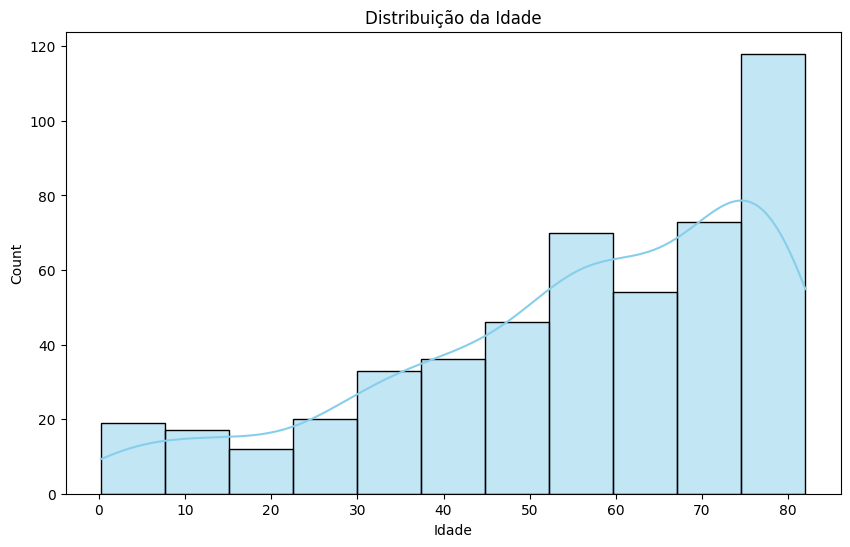

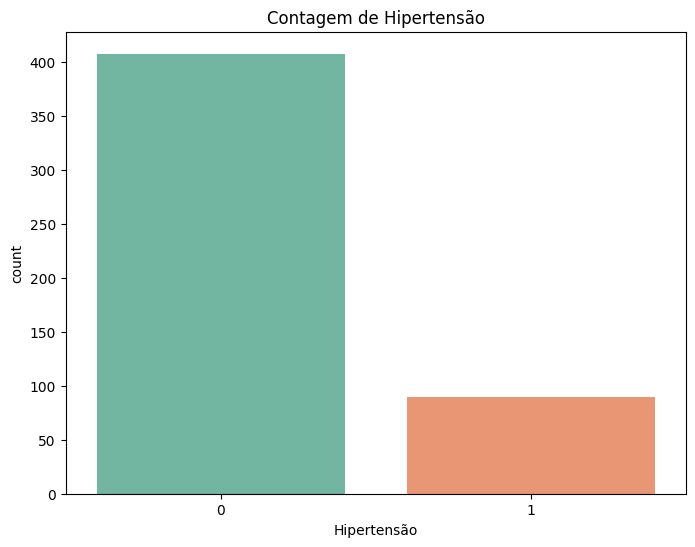

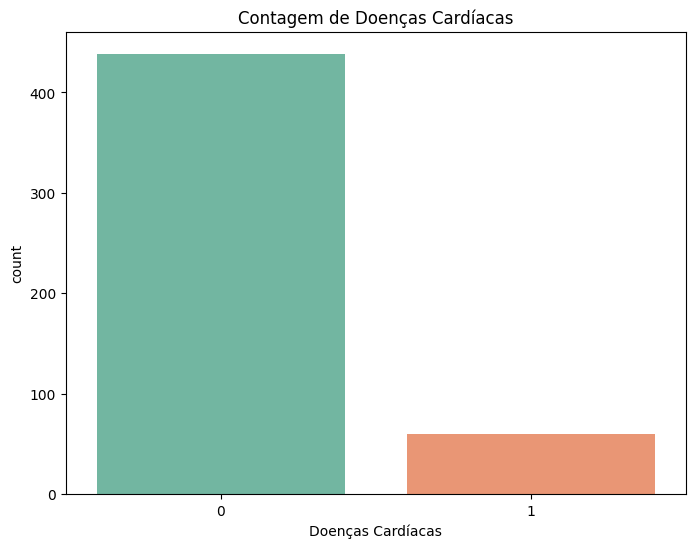

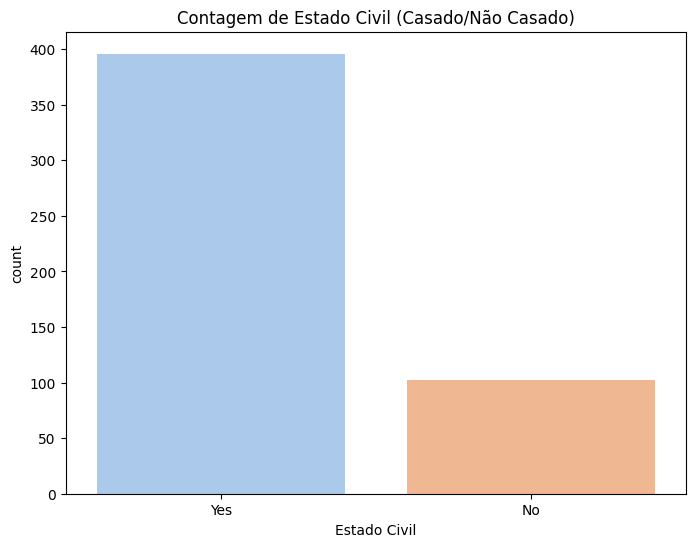

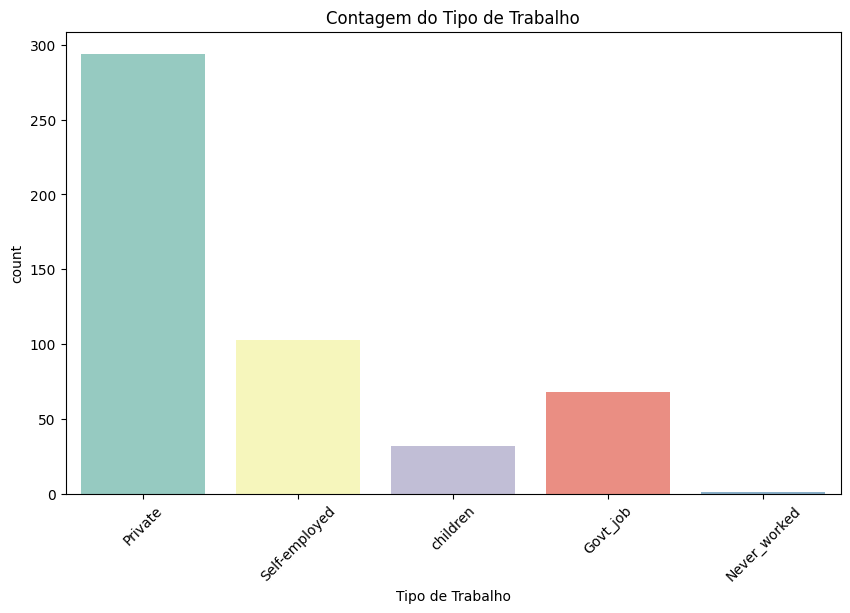

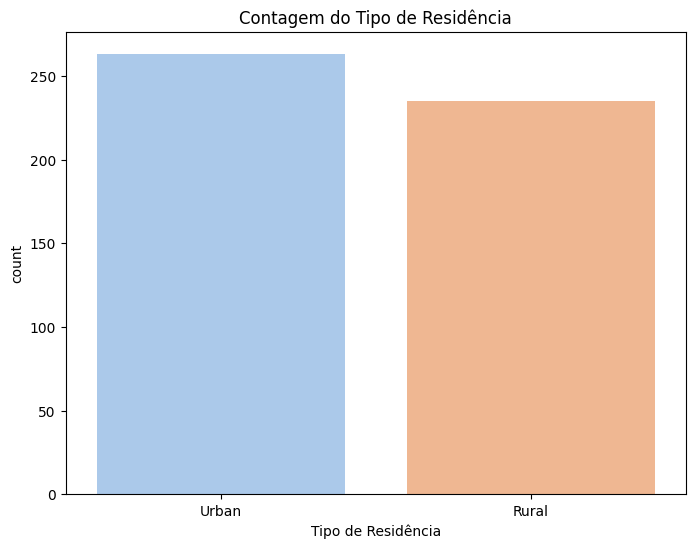

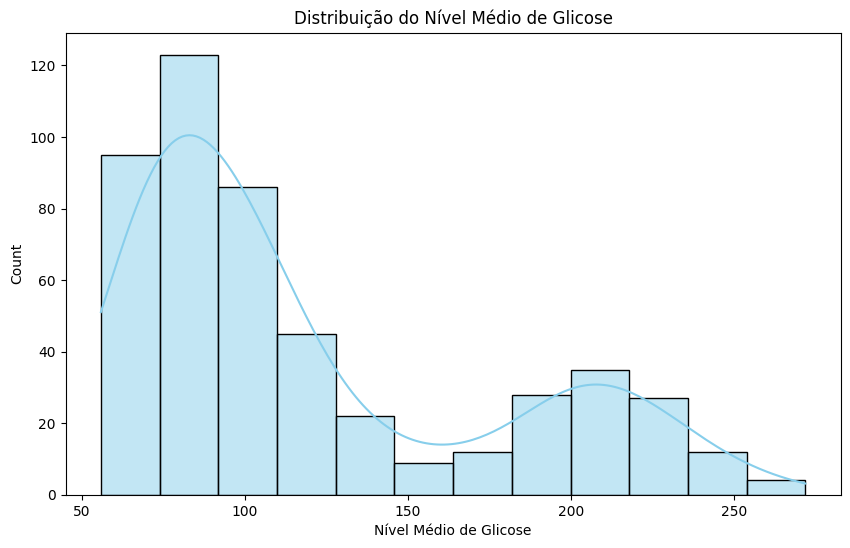

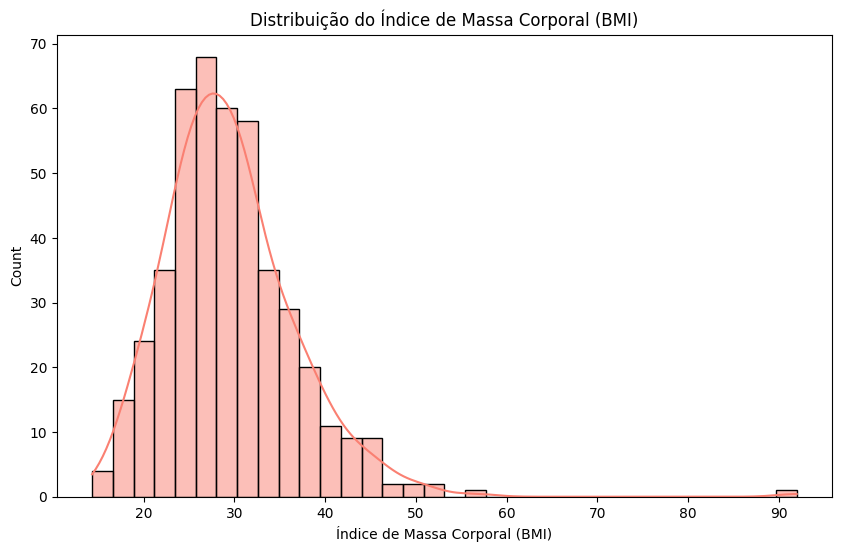

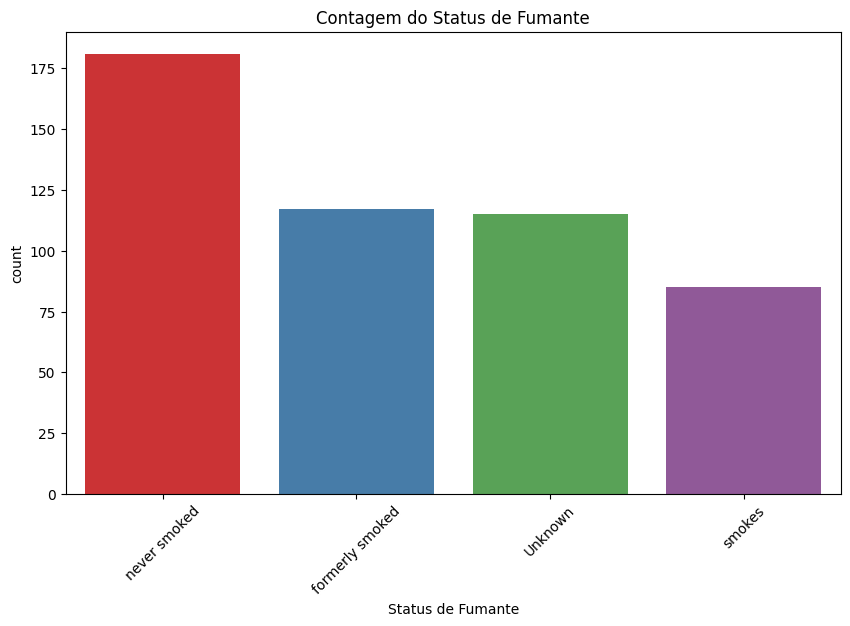

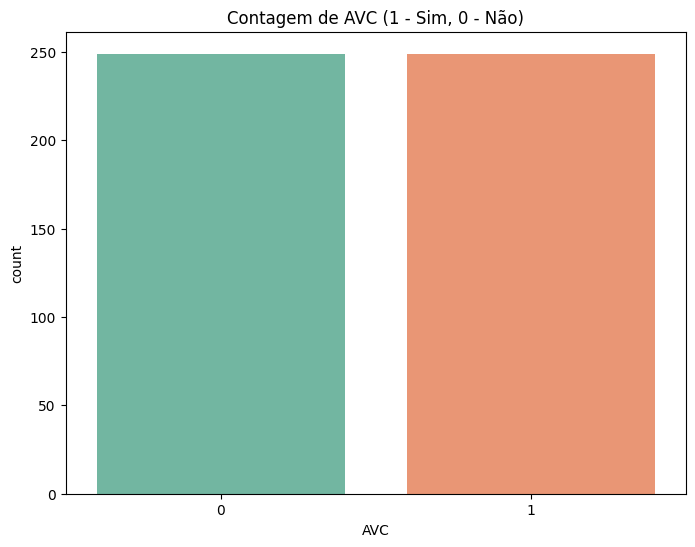

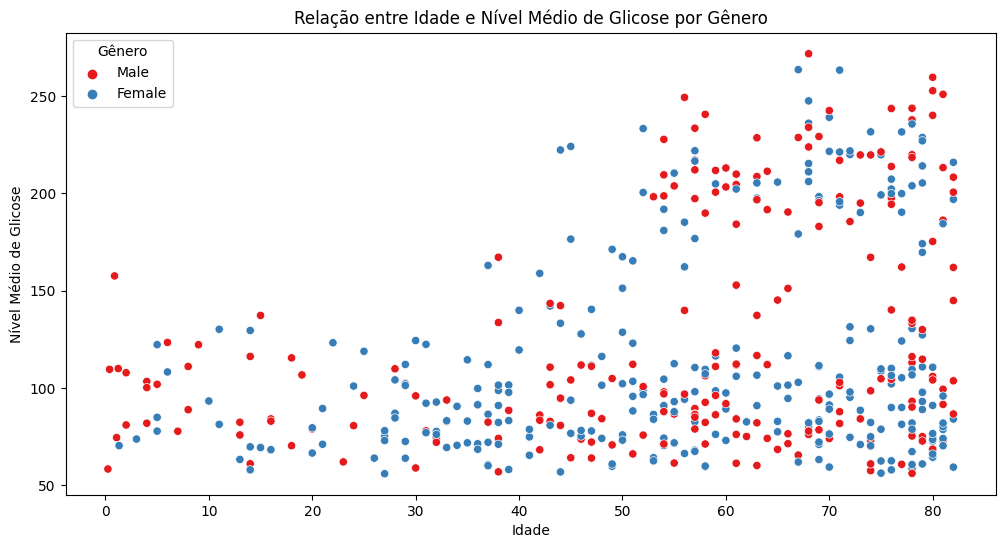

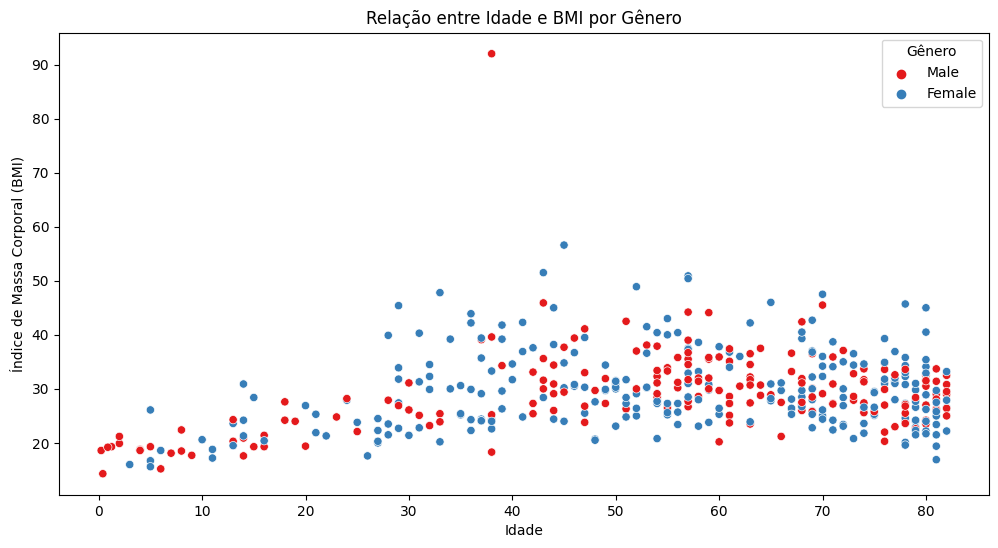

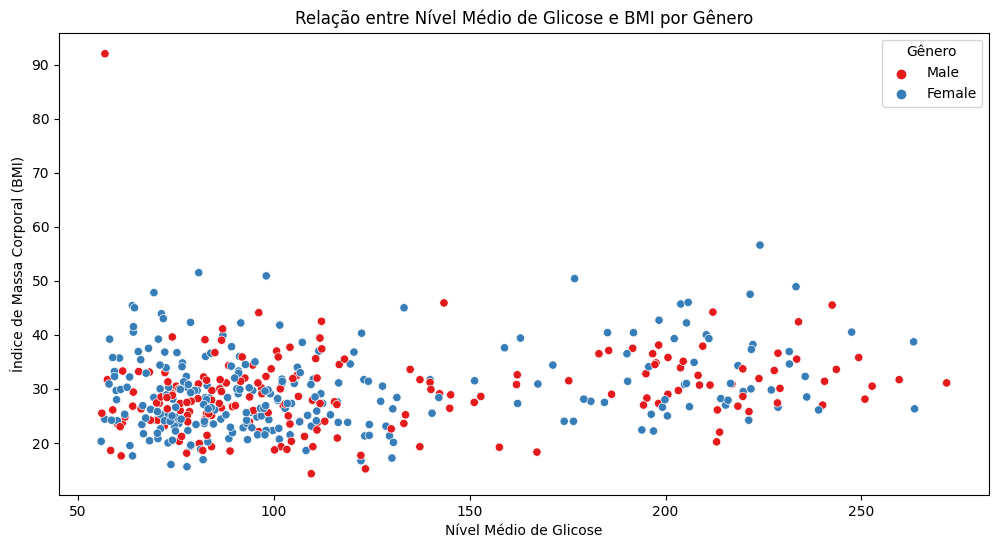

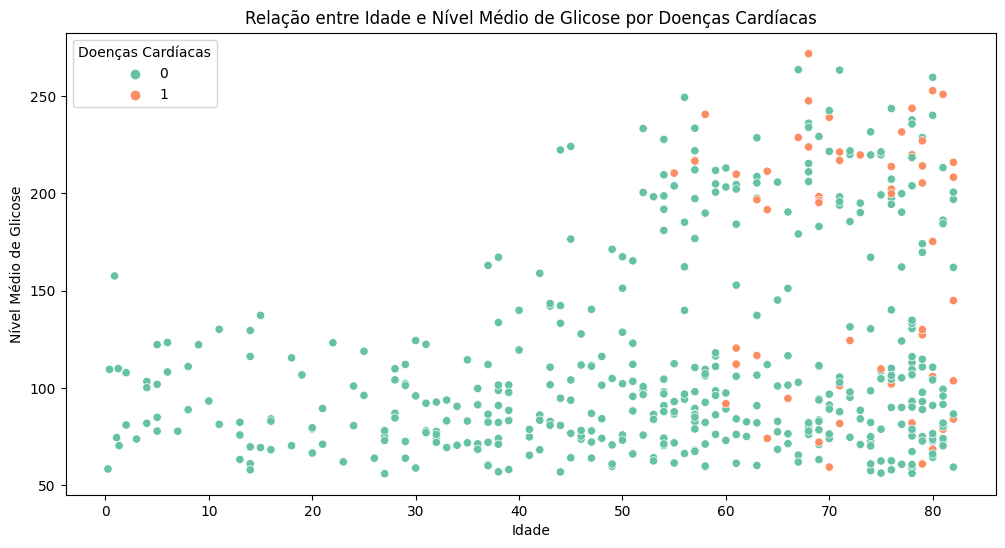

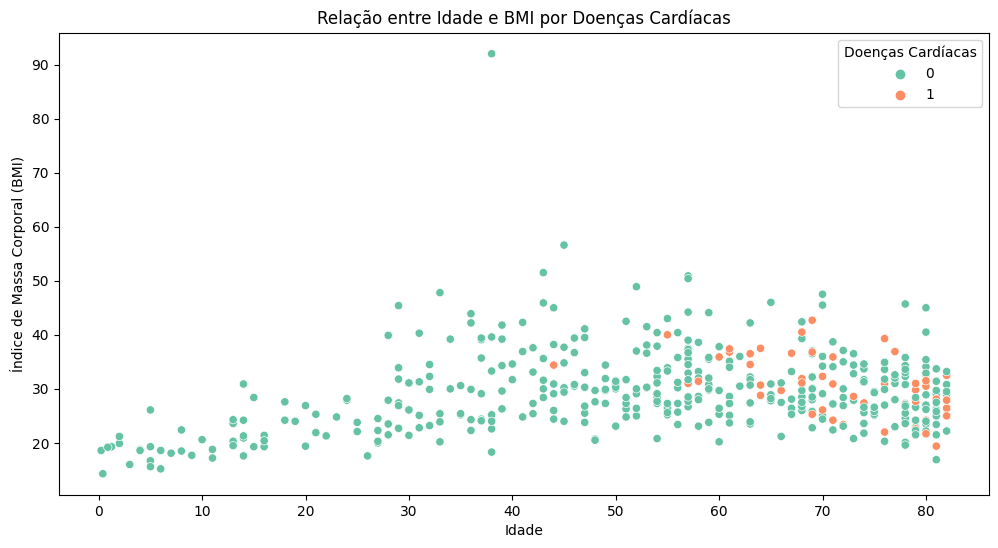

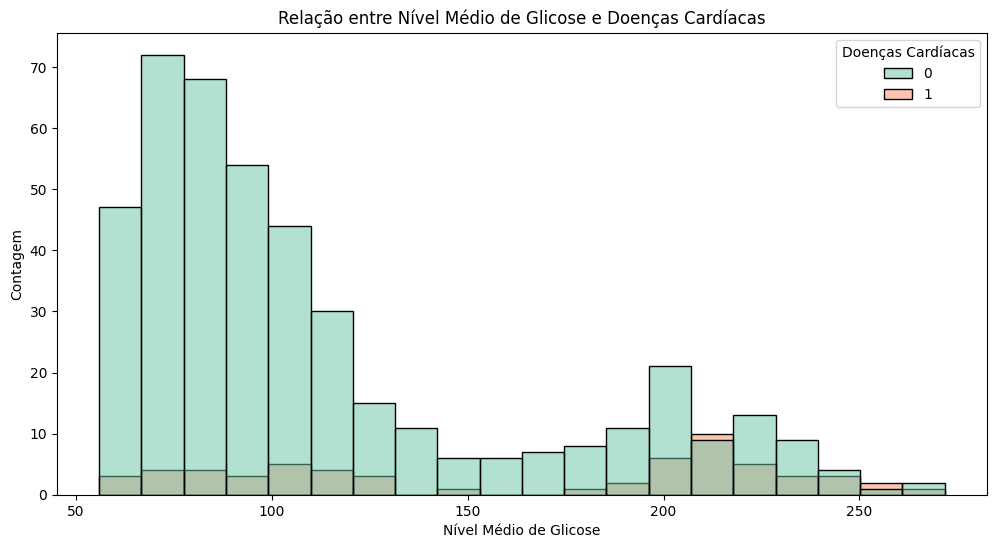

In [563]:
data = df_resampled

# Gráfico de distribuição da Idade

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Idade', kde=True, color='skyblue')

plt.title('Distribuição da Idade')

plt.show()
 
# Gráfico de contagem de Hipertensão

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Hipertensão', palette='Set2')

plt.title('Contagem de Hipertensão')

plt.show()
 
# Gráfico de contagem de Doenças Cardíacas

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Doenças Cardíacas', palette='Set2')

plt.title('Contagem de Doenças Cardíacas')

plt.show()
 
# Gráfico de contagem de Estado Civil

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Estado Civil', palette='pastel')

plt.title('Contagem de Estado Civil (Casado/Não Casado)')

plt.show()
 
# Gráfico de contagem do Tipo de Trabalho

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='Tipo de Trabalho', palette='Set3')

plt.title('Contagem do Tipo de Trabalho')

plt.xticks(rotation=45)

plt.show()
 
# Gráfico de contagem do Tipo de Residência

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Tipo de Residência', palette='pastel')

plt.title('Contagem do Tipo de Residência')

plt.show()
 
# Gráfico de distribuição do Nível Médio de Glicose

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Nível Médio de Glicose', kde=True, color='skyblue')

plt.title('Distribuição do Nível Médio de Glicose')

plt.show()
 
# Gráfico de distribuição do Índice de Massa Corporal (BMI)

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Índice de Massa Corporal (BMI)', kde=True, color='salmon')

plt.title('Distribuição do Índice de Massa Corporal (BMI)')

plt.show()
 
# Gráfico de contagem do Status de Fumante

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='Status de Fumante', palette='Set1')

plt.title('Contagem do Status de Fumante')

plt.xticks(rotation=45)

plt.show()
 
# Gráfico de contagem de AVC

plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='AVC', palette='Set2')

plt.title('Contagem de AVC (1 - Sim, 0 - Não)')

plt.show()
 
# Gráfico de relação entre Idade e Nível Médio de Glicose por Gênero

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Nível Médio de Glicose', hue='Gênero', palette='Set1')

plt.title('Relação entre Idade e Nível Médio de Glicose por Gênero')

plt.show()
 
# Gráfico de relação entre Idade e BMI por Gênero

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Índice de Massa Corporal (BMI)', hue='Gênero', palette='Set1')

plt.title('Relação entre Idade e BMI por Gênero')

plt.show()
 
# Gráfico de relação entre Nível Médio de Glicose e BMI por Gênero

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Nível Médio de Glicose', y='Índice de Massa Corporal (BMI)', hue='Gênero', palette='Set1')

plt.title('Relação entre Nível Médio de Glicose e BMI por Gênero')

plt.show()
 
# Gráfico de relação entre Idade e Nível Médio de Glicose por Doenças Cardíacas

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Nível Médio de Glicose', hue='Doenças Cardíacas', palette='Set2')

plt.title('Relação entre Idade e Nível Médio de Glicose por Doenças Cardíacas')

plt.show()
 
# Gráfico de relação entre Idade e BMI por Doenças Cardíacas

plt.figure(figsize=(12, 6))

sns.scatterplot(data=data, x='Idade', y='Índice de Massa Corporal (BMI)', hue='Doenças Cardíacas', palette='Set2')

plt.title('Relação entre Idade e BMI por Doenças Cardíacas')

plt.show()
 
plt.figure(figsize=(12, 6))

sns.histplot(data=data, x='Nível Médio de Glicose', hue='Doenças Cardíacas', bins=20, palette='Set2', kde=False)

plt.title('Relação entre Nível Médio de Glicose e Doenças Cardíacas')

plt.xlabel('Nível Médio de Glicose')

plt.ylabel('Contagem')

plt.show()

In [564]:
df_resampled

,id,Gênero,Idade,Hipertensão,Doenças Cardíacas,Estado Civil,Tipo de Trabalho,Tipo de Residência,Nível Médio de Glicose,Índice de Massa Corporal (BMI),Status de Fumante,AVC
2435,2244,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
3600,26076,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2900,31019,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
2353,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4060,68330,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


## Normalização dos dados

In [565]:
# Selecione as colunas que você deseja normalizar
colunas_para_normalizar = ['Idade', 'Nível Médio de Glicose', 'Índice de Massa Corporal (BMI)']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados e transformar os dados
df_resampled[colunas_para_normalizar] = scaler.fit_transform(df_resampled[colunas_para_normalizar])

# Exibir os dados normalizados
print("Dados original:\n", df_resampled)
print("\nDados normalizados:\n", dados_normalizados)


Dados original:
          id  Gênero     Idade  Hipertensão  Doenças Cardíacas Estado Civil  \
2435   2244    Male -0.541451            0                  0          Yes   
3600  26076  Female  0.912486            1                  0          Yes   
2900  31019  Female  0.021364            0                  0          Yes   
2353  27849  Female -2.370598            0                  0           No   
4060  68330  Female  0.631079            0                  0          Yes   
...     ...     ...       ...          ...                ...          ...   
244   17739    Male  0.068265            0                  0          Yes   
245   49669  Female -1.948487            0                  0           No   
246   27153  Female  0.912486            0                  0          Yes   
247   34060    Male  0.724882            1                  0          Yes   
248   43424  Female  1.053190            0                  0          Yes   

     Tipo de Trabalho Tipo de Residência  Níve

## Conversão simbólica usando Ordinal Encoder

In [566]:
x = df_resampled["Status de Fumante"].values.reshape(-1, 1)

# Passo 2: criar uma instância do encoder
ordem = [["Unknown", "never smoked", "formerly smoked", "smokes"]] # uma lista para cada coluna
encoder = OrdinalEncoder(categories=ordem)

# Passo 3: ajustar o  aos dados
encoder.fit(x)

# Passo 4: aplicar o encoder usando o método `transform`
df_resampled["Status de Fumante"] = encoder.transform(x)

###############################################################################################

x2 = df_resampled["Tipo de Trabalho"].values.reshape(-1, 1)

ordem2 = [["Private", "children", "Never_worked", "Self-employed", "Govt_job"]]
encoder2 = OrdinalEncoder(categories=ordem2)

encoder2.fit(x2)

df_resampled["Tipo de Trabalho"] = encoder2.transform(x2)

###############################################################################################

x3 = df_resampled["Tipo de Residência"].values.reshape(-1, 1)

ordem3 = [["Urban", "Rural"]]
encoder3 = OrdinalEncoder(categories=ordem3)

encoder3.fit(x3)

df_resampled["Tipo de Residência"] = encoder3.transform(x3)

###############################################################################################

x4 = df_resampled["Gênero"].values.reshape(-1, 1)

ordem4 = [["Male", "Female"]]
encoder4 = OrdinalEncoder(categories=ordem4)

encoder4.fit(x4)

df_resampled["Gênero"] = encoder4.transform(x4)

###############################################################################################

x5 = df_resampled["Estado Civil"].values.reshape(-1, 1)

ordem5 = [["No", "Yes"]]
encoder5 = OrdinalEncoder(categories=ordem5)

encoder5.fit(x5)

df_resampled["Estado Civil"] = encoder5.transform(x5)

In [567]:
print(45*'-', 'Resultado', 45*'-')
df_resampled

--------------------------------------------- Resultado ---------------------------------------------


,id,Gênero,Idade,Hipertensão,Doenças Cardíacas,Estado Civil,Tipo de Trabalho,Tipo de Residência,Nível Médio de Glicose,Índice de Massa Corporal (BMI),Status de Fumante,AVC
2435,2244,0.0,-0.541451,0,0,1.0,0.0,0.0,-0.693035,0.188375,1.0,0
3600,26076,1.0,0.912486,1,0,1.0,3.0,1.0,1.804874,0.000120,2.0,0
2900,31019,1.0,0.021364,0,0,1.0,0.0,0.0,-0.451632,-0.510858,1.0,0
2353,27849,1.0,-2.370598,0,0,0.0,1.0,0.0,0.052368,-1.721069,0.0,0
4060,68330,1.0,0.631079,0,0,1.0,3.0,1.0,-0.150417,-0.483964,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,0.0,0.068265,0,0,1.0,0.0,1.0,-0.617417,0.968289,0.0,1
245,49669,1.0,-1.948487,0,0,0.0,1.0,1.0,-1.102917,0.188375,0.0,1
246,27153,1.0,0.912486,0,0,1.0,3.0,1.0,-0.728060,-0.026774,2.0,1
247,34060,0.0,0.724882,1,0,1.0,3.0,1.0,-0.566406,NaN,0.0,1


## Split de treino e teste

In [568]:
TAMANHO_TESTE = 0.10
SEMENTE_ALEATORIA = 6431
NUM_FOLDS = 10
NUM_TENTATIVAS = 50


FEATURES = ["Gênero", 'Idade', 'Hipertensão', 'Doenças Cardíacas', "Estado Civil",
            'Nível Médio de Glicose', 'Tipo de Trabalho', 'Índice de Massa Corporal (BMI)',
           'Tipo de Residência', 'Status de Fumante']
TARGET = ['AVC']

df_resampled = df_resampled.reindex(FEATURES + TARGET, axis=1)
df_resampled = df_resampled.dropna()

indices = df_resampled.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df_resampled.loc[indices_treino]
df_teste = df_resampled.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

## Otimização de hiperparâmetros

In [569]:
def cria_instancia_modelo_knn(trial):
    """Cria uma instância do modelo K-Nearest Neighbors.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo K-Nearest Neighbors com os parâmetros otimizados.
    """

    parametros = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 30),
        
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        
        "algorithm": trial.suggest_categorical("algorithm", ["auto", "ball_tree", "kd_tree", "brute"]),
        
        "leaf_size": trial.suggest_int("leaf_size", 10, 50),
        
        "p": trial.suggest_int("p", 1, 5),
    }

    model = KNeighborsClassifier(**parametros)

    return model

### Função objetivo

In [570]:
def funcao_objetivo(
    trial,
    X,
    y,
    num_folds=NUM_FOLDS,
):
    """Função objetivo do optuna para otimizar o KNN com base na acurácia."""
    
    modelo = cria_instancia_modelo_knn(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="accuracy",
        cv=num_folds,
    )

    return metricas.mean()

In [571]:
objeto_de_estudo = create_study(direction="maximize", pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler(seed=SEMENTE_ALEATORIA))

[I 2023-11-15 20:47:18,473] A new study created in memory with name: no-name-a3148b5e-4cd6-480a-845c-8e09502b41af


In [572]:
def funcao_objetivo_parcial(trial):
    return funcao_objetivo(trial, X_treino, y_treino)

objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

[I 2023-11-15 20:47:18,642] Trial 0 finished with value: 0.7196341463414633 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 46, 'p': 5}. Best is trial 0 with value: 0.7196341463414633.
[I 2023-11-15 20:47:18,770] Trial 1 finished with value: 0.7421341463414634 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 12, 'p': 2}. Best is trial 1 with value: 0.7421341463414634.
[I 2023-11-15 20:47:18,861] Trial 2 finished with value: 0.7322560975609755 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 19, 'p': 1}. Best is trial 1 with value: 0.7421341463414634.
[I 2023-11-15 20:47:19,100] Trial 3 finished with value: 0.608048780487805 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 35, 'p': 3}. Best is trial 1 with value: 0.7421341463414634.
[I 2023-11-15 20:47:19,239] Trial 4 finished with value: 0.7444512195121952

### Resultados

In [573]:
df = objeto_de_estudo.trials_dataframe()

df

,number,value,datetime_start,datetime_complete,duration,params_algorithm,params_leaf_size,params_n_neighbors,params_p,params_weights,state
0,0,0.719634,2023-11-15 20:47:18.513881,2023-11-15 20:47:18.642870,0 days 00:00:00.128989,kd_tree,46,15,5,distance,COMPLETE
1,1,0.742134,2023-11-15 20:47:18.659760,2023-11-15 20:47:18.770831,0 days 00:00:00.111071,kd_tree,12,8,2,uniform,COMPLETE
2,2,0.732256,2023-11-15 20:47:18.778922,2023-11-15 20:47:18.853782,0 days 00:00:00.074860,kd_tree,19,12,1,distance,COMPLETE
3,3,0.608049,2023-11-15 20:47:18.862080,2023-11-15 20:47:19.099832,0 days 00:00:00.237752,brute,35,2,3,uniform,COMPLETE
4,4,0.744451,2023-11-15 20:47:19.107604,2023-11-15 20:47:19.226208,0 days 00:00:00.118604,auto,14,21,5,uniform,COMPLETE
5,5,0.741951,2023-11-15 20:47:19.243419,2023-11-15 20:47:19.388947,0 days 00:00:00.145528,auto,27,25,5,distance,COMPLETE
6,6,0.749207,2023-11-15 20:47:19.396268,2023-11-15 20:47:19.561548,0 days 00:00:00.165280,kd_tree,15,29,4,uniform,COMPLETE
7,7,0.741951,2023-11-15 20:47:19.569567,2023-11-15 20:47:19.764701,0 days 00:00:00.195134,brute,24,23,3,uniform,COMPLETE
8,8,0.742012,2023-11-15 20:47:19.773056,2023-11-15 20:47:19.844502,0 days 00:00:00.071446,ball_tree,18,26,2,distance,COMPLETE
9,9,0.677683,2023-11-15 20:47:19.844502,2023-11-15 20:47:19.926318,0 days 00:00:00.081816,auto,33,4,1,distance,COMPLETE


In [574]:
melhor_trial = objeto_de_estudo.best_trial

print(f"Número do melhor trial: {melhor_trial.number}")
print(f"Parâmetros do melhor trial: {melhor_trial.params}")

Número do melhor trial: 42
Parâmetros do melhor trial: {'n_neighbors': 25, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 15, 'p': 3}


In [575]:
from sklearn.metrics import accuracy_score

modelo = cria_instancia_modelo_knn(melhor_trial)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)

acuracia = accuracy_score(y_verdadeiro, y_previsao)

print("Acurácia:", acuracia)

Acurácia: 0.6666666666666666


## Matriz de confusão

Realizando o cálculo de acurácia, podemos observar que para esse modelo ela foi de 66.66666666666666%


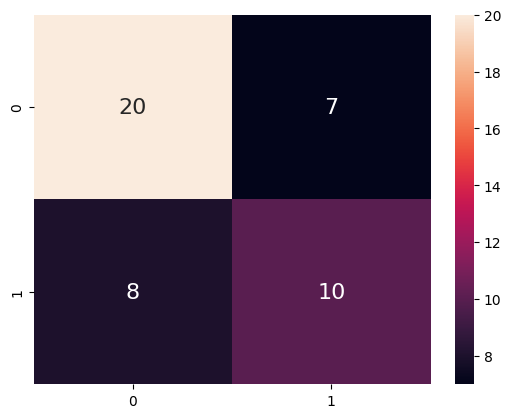

In [576]:
nomes_das_features = ['0', '1']


modelo_rf = KNeighborsClassifier(
        n_neighbors= 25,
        weights= 'uniform', 
        algorithm= 'brute', 
        leaf_size= 15, 
        p= 3) 

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf, nomes_das_features, nomes_das_features)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})
print(f'Realizando o cálculo de acurácia, podemos observar que para esse modelo ela foi de {acuracia*100}%')